# **LIBRARY**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import optuna

In [ ]:
import os

print(os.getcwd())

/content


In [ ]:
import os
import re
import warnings
print(os.listdir("/content/"))
import io
import requests
url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

test_data_with_labels = c
test_data_1 = pd.read_csv('/content/test.csv')

warnings.filterwarnings('ignore')

for i, name in enumerate(test_data_with_labels['name']):
    if '"' in name:
        test_data_with_labels['name'][i] = re.sub('"', '', name)

for i, name in enumerate(test_data_1['Name']):
    if '"' in name:
        test_data_1['Name'][i] = re.sub('"', '', name)

survived = []

for name in test_data_1['Name']:
    survived.append(int(test_data_with_labels.loc[test_data_with_labels['name'] == name]['survived'].values[-1]))


submission = pd.read_csv('/content/gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('final1submission.csv', index=False)
pp=pd.read_csv('final1submission.csv')
pp.head()

['.config', 'train.csv', 'final1submission.csv', 'test.csv', 'gender_submission.csv', 'sample_data']


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **IMPORT DATASET**

In [ ]:
training_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
output_data = pd.read_csv('/content/gender_submission.csv')
training_data.shape

(891, 12)

In [ ]:
columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
train_data = training_data[columns]
test_data = test_data.merge(pp, on ='PassengerId')

combined_data = pd.concat([train_data, test_data], ignore_index = True)
training_data = combined_data.copy()
training_data.shape

(1309, 12)

# **DATA OVERVIEW**

In [ ]:
output_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# **DATA VISUALIZATION**

<Axes: xlabel='Survived', ylabel='count'>

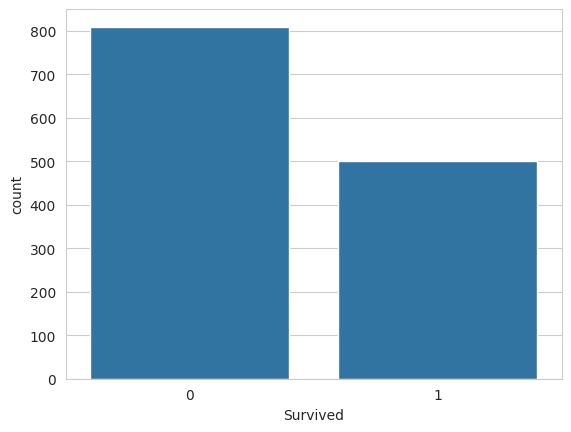

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=training_data)

In [ ]:
filtered_data = training_data[~training_data['Embarked'].isin(['C','S','Q'])]
filtered_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


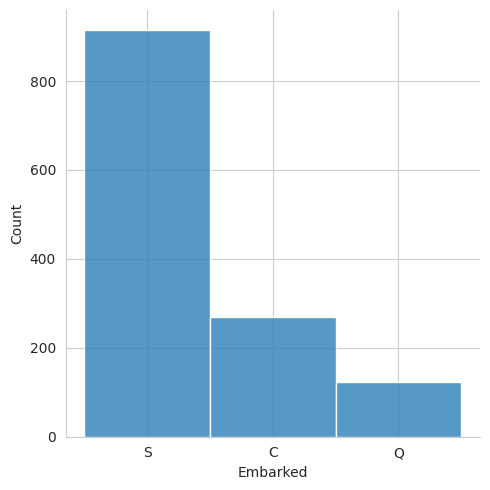

In [ ]:
sns.displot(data=training_data, x='Embarked')

In [ ]:
#mengisi nan pada embarked dengan nilai modus
embarked_mode = training_data['Embarked'].mode()[0]
training_data['Embarked'].fillna(embarked_mode,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

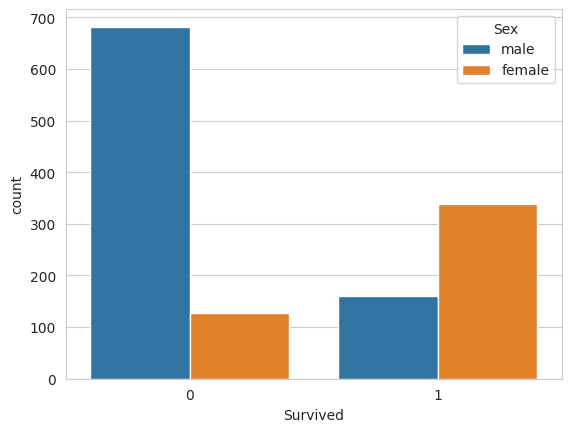

In [ ]:
sns.countplot(x='Survived', data=training_data, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

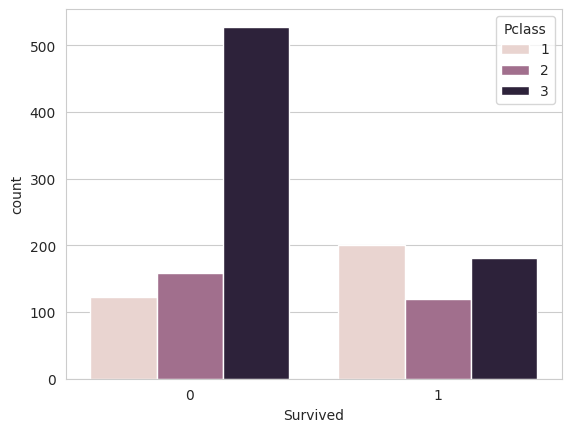

In [ ]:
sns.countplot(x='Survived', data=training_data, hue='Pclass')

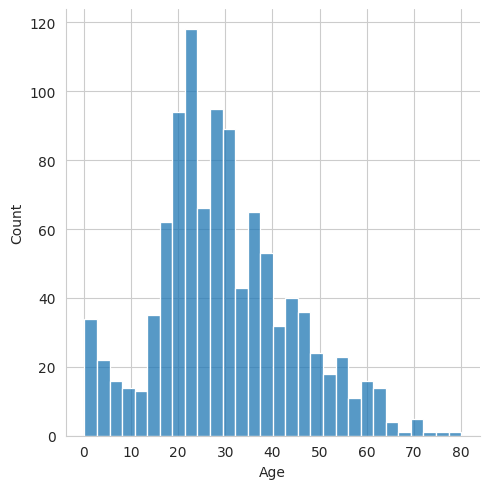

In [ ]:
sns.displot(training_data['Age'], kde=False, bins=30)

In [ ]:
training_data['Age'].describe()

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


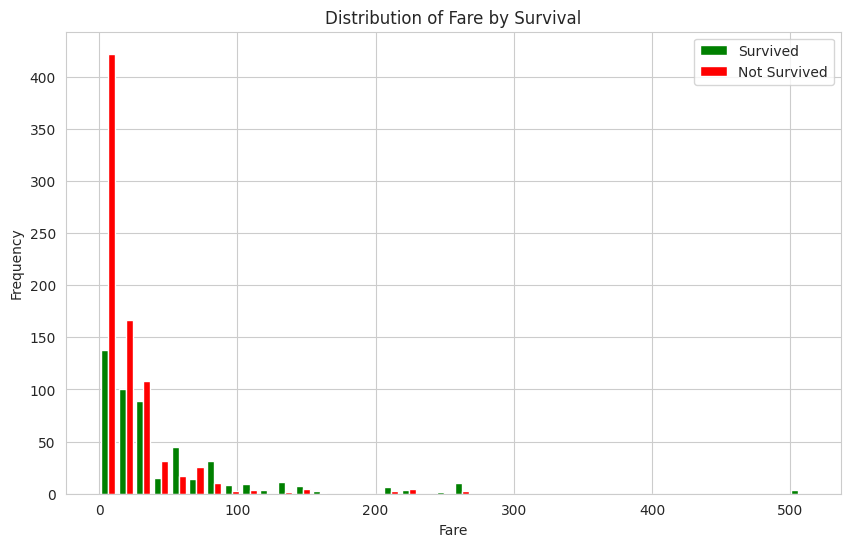

In [ ]:
survived_fares = training_data[training_data['Survived'] == 1]['Fare']
not_survived_fares = training_data[training_data['Survived'] == 0]['Fare']

plt.figure(figsize=(10, 6))
plt.hist([survived_fares, not_survived_fares], bins=40, color=['green', 'red'], label=['Survived', 'Not Survived'])
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival')
plt.legend()
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

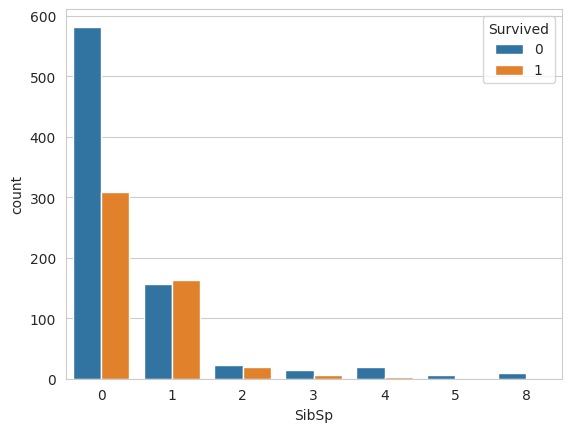

In [ ]:
sns.countplot(x='SibSp', data = training_data, hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

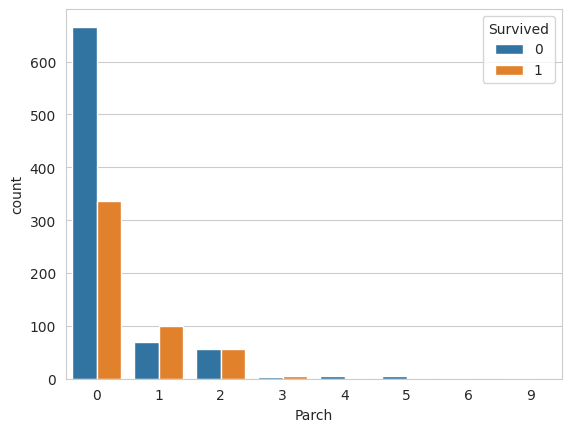

In [ ]:
sns.countplot(x='Parch', data = training_data, hue='Survived')

# **DATA PREPROCESSING**

<Axes: >

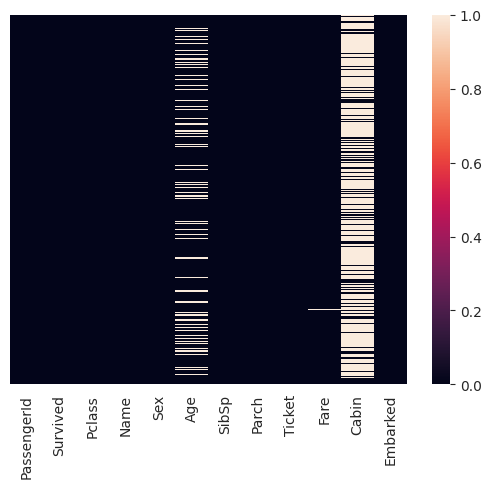

In [ ]:
sns.heatmap(training_data.isnull(), yticklabels=False)

<Axes: >

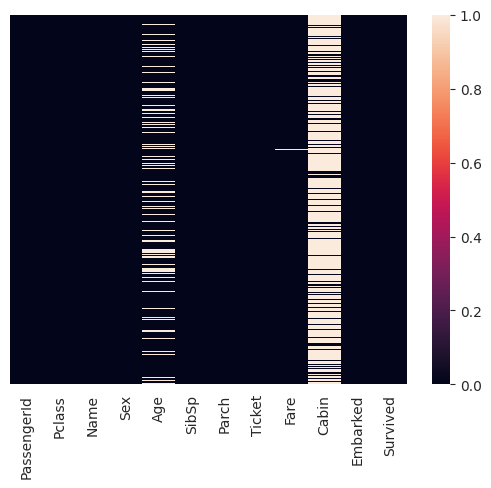

In [ ]:
sns.heatmap(test_data.isnull(), yticklabels=False)

In [ ]:
def add_title_and_encode(data):
    # Extract titles using a raw string for the regex pattern
    data['Title'] = data.Name.str.extract(r' ([A-Za-z]+)\.', expand=False)
    data.Title = data.Title.replace(['Master','Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major',
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    #data.Title = data.Title.replace('Mlle', 'Miss')
    data.Title = data.Title.replace(['Mlle','Ms','Miss'],'Miss')
    #data.Title = data.Title.replace('Ms', 'Miss')
    data.Title = data.Title.replace('Mme', 'Mrs')

    # Apply OneHotEncoder to the 'Title' column
    encoder_title = OneHotEncoder(sparse_output=False, drop=None)
    title_encoded = encoder_title.fit_transform(data[['Title']])

    # Create a DataFrame with the encoded columns and appropriate column names
    title_encoded_df = pd.DataFrame(title_encoded, columns=encoder_title.get_feature_names_out(['Title'])).astype(int)

    # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, title_encoded_df], axis=1)

    # Drop the original 'Title' column
    data.drop('Title', axis=1, inplace=True)

    # Apply OneHotEncoder to the 'Embarked' column
    encoder_embarked = OneHotEncoder(sparse_output=False, drop='first')
    embarked_encoded = encoder_embarked.fit_transform(data[['Embarked']])

    # Create a DataFrame with the encoded columns and appropriate column names
    embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked'])).astype(int)

    # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, embarked_encoded_df], axis=1)

    # Apply OneHotEncoder to the 'Sex' column
    encoder_Sex = OneHotEncoder(sparse_output=False, drop='first')
    Sex_encoded = encoder_Sex.fit_transform(data[['Sex']])

    # Create a DataFrame with the encoded columns and appropriate column names
    Sex_encoded_df = pd.DataFrame(Sex_encoded, columns=encoder_Sex.get_feature_names_out(['Sex'])).astype(int)

    # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, Sex_encoded_df], axis=1)

    # Apply OneHotEncoder to the 'Pclass' column
    encoder_Pclass = OneHotEncoder(sparse_output=False, drop='first')
    Pclass_encoded = encoder_Pclass.fit_transform(data[['Pclass']])

    # Create a DataFrame with the encoded columns and appropriate column names
    Pclass_encoded_df = pd.DataFrame(Pclass_encoded, columns=encoder_Pclass.get_feature_names_out(['Pclass'])).astype(int)

    # Concatenate the original data with the new one-hot-encoded columns for Pclass
    data = pd.concat([data, Pclass_encoded_df], axis=1)

    # Drop the original 'Sex', 'Pclass', 'Embarked', and other unnecessary columns
    data.drop(['Sex', 'Pclass', 'Embarked', 'Name', 'PassengerId','Cabin','Ticket'], axis=1, inplace=True)

    return data

In [ ]:
df_train['Title'].value_counts()

NameError: name 'df_train' is not defined

In [ ]:
training_data = add_title_and_encode(training_data)
test_data = add_title_and_encode(test_data)

In [ ]:
training_data.head()

,Survived,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,0,1,1,0,1


In [ ]:
test_data.head()

,Age,SibSp,Parch,Fare,Survived,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,0,1
1,47.0,1,0,7.0000,1,0,0,1,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,1,0
3,27.0,0,0,8.6625,0,0,1,0,0,0,1,1,0,1
4,22.0,1,1,12.2875,1,0,0,1,0,0,1,0,0,1


# **FILL MISSING VALUES**

In [ ]:
test_data['Fare']=test_data['Fare'].fillna(np.mean(test_data['Fare']))
training_data['Fare']=training_data['Fare'].fillna(np.mean(training_data['Fare']))

In [ ]:
def fill_age_based_on_title(data):
  median_ages = data.groupby(['Title_Miss','Title_Mr','Title_Mrs','Title_Rare'])['Age'].median()
  for index, row in data.iterrows():
    if pd.isnull(row['Age']):
      encoded_titles = (row['Title_Miss'],row['Title_Mr'], row['Title_Mrs'], row['Title_Rare'])
      median_age = median_ages.loc[encoded_titles]
      data.at[index,'Age']=median_age
    return data

In [ ]:
def fill_age_based_on_title(data):
    # Create a new column 'Title' to map back to the original title based on one-hot encoded columns
    conditions = [
        (data['Title_Miss'] == 1),
        (data['Title_Mr'] == 1),
        (data['Title_Mrs'] == 1),
        (data['Title_Rare'] == 1)
    ]
    choices = ['Miss', 'Mr', 'Mrs', 'Rare']

    # Create the 'Title' column using np.select
    data['Title'] = np.select(conditions, choices, default=np.nan)

    # Group by the newly created 'Title' column to compute the median age
    median_ages = data.groupby('Title')['Age'].median()

    # Fill missing Age values based on the median age for each Title
    data['Age'] = data.apply(lambda row: median_ages.loc[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

    # Drop the 'Title' column (optional)
    data.drop(columns=['Title'], inplace=True)

    return data


In [ ]:
training_data = fill_age_based_on_title(training_data)
test_data = fill_age_based_on_title(test_data)

<Axes: >

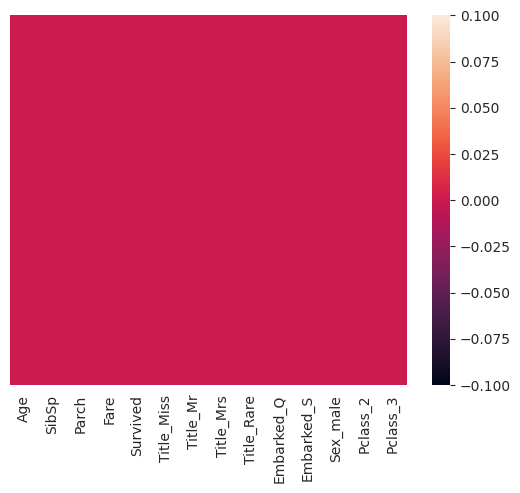

In [ ]:
sns.heatmap(test_data.isnull(), yticklabels=False)

<Axes: >

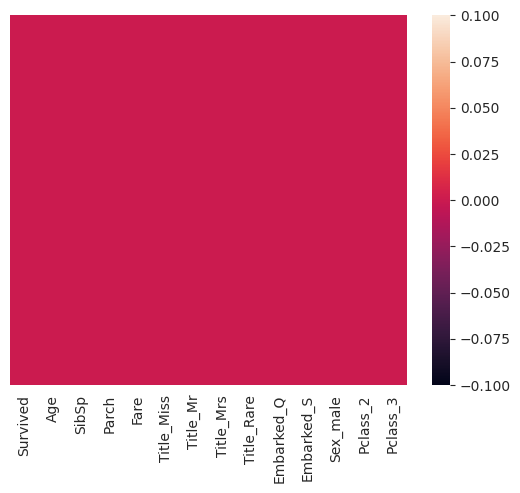

In [ ]:
sns.heatmap(training_data.isnull(), yticklabels=False)

# **ADDING FEATURES**

In [ ]:
def add_features(data):
    # Family Size
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 1
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    data['FarePerPerson'] = data['Fare'] / data['FamilySize']
    data.drop('Fare', axis=1, inplace=True)
    return data

training_data = add_features(training_data)
test_data = add_features(test_data)

<Axes: >

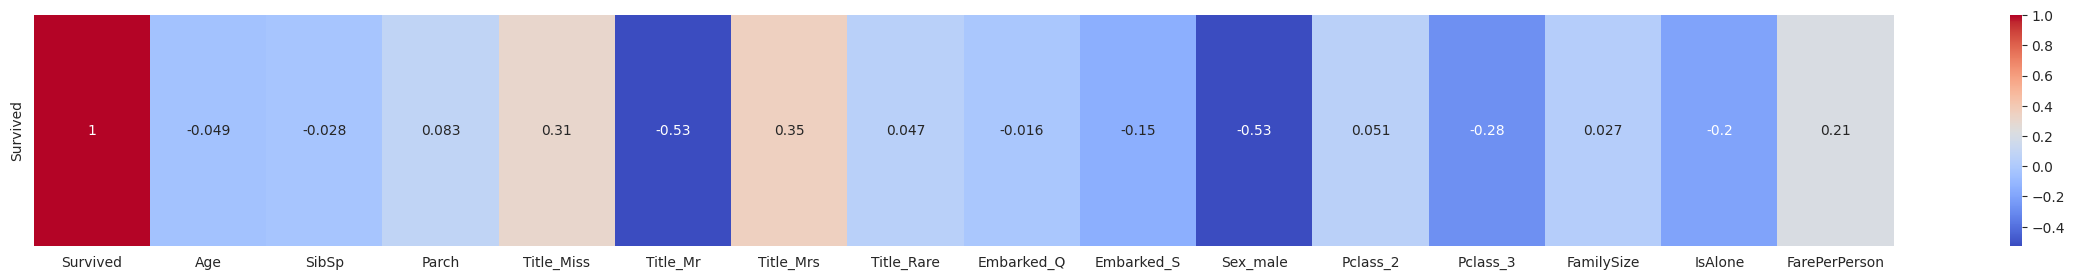

In [ ]:
plt.figure(figsize=(30,3))
sns.heatmap(training_data.corr()[0:1],annot=True,cmap="coolwarm")

# **SPLITTING DATA**

In [ ]:
X = training_data.drop('Survived', axis=1)  # Features
y = training_data['Survived']

# **MODELLING**

In [ ]:
Score_Tracker=[]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    predictions = model.predict(test_data)
    # Calculate the accuracy on the test dataset
    accuracy = accuracy_score(pp['Survived'], predictions)
    print("Accuracy on test dataset:", accuracy * 100,"value of k",i)
model_KNN=KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X, y)
predictions = model_KNN.predict(test_data)
    # Calculate the accuracy on the test dataset
accuracy = accuracy_score(pp['Survived'], predictions)
print("Accuracy on test dataset:", accuracy * 100,"value of k",i)
Score_Tracker.append({accuracy,"KNeighborsClassifier "})

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Score_Tracker = []  # Initialize the score tracker

# Ensure 'Survived' column is not part of test data during prediction
X_test = test_data.drop(columns=['Survived'], errors='ignore')

for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(test_data['Survived'], predictions)
    print(f"Accuracy on test dataset: {accuracy * 100:.2f}%, value of k: {i}")

    # Track accuracy for each k
    Score_Tracker.append({'k': i, 'accuracy': accuracy, 'model': "KNeighborsClassifier"})

# Final model with k=1
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X, y)
predictions = model_KNN.predict(X_test)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Final Accuracy on test dataset: {accuracy * 100:.2f}%, value of k: 1")

# Track the final model accuracy
Score_Tracker.append({'k': 1, 'accuracy': accuracy, 'model': "KNeighborsClassifier"})

# Output Score_Tracker
print(Score_Tracker)


Accuracy on test dataset: 93.06%, value of k: 1
Accuracy on test dataset: 77.99%, value of k: 2
Accuracy on test dataset: 77.99%, value of k: 3
Accuracy on test dataset: 78.23%, value of k: 4
Accuracy on test dataset: 77.03%, value of k: 5
Accuracy on test dataset: 73.44%, value of k: 6
Accuracy on test dataset: 74.16%, value of k: 7
Accuracy on test dataset: 73.44%, value of k: 8
Accuracy on test dataset: 73.92%, value of k: 9
Final Accuracy on test dataset: 93.06%, value of k: 1
[{'k': 1, 'accuracy': 0.930622009569378, 'model': 'KNeighborsClassifier'}, {'k': 2, 'accuracy': 0.7799043062200957, 'model': 'KNeighborsClassifier'}, {'k': 3, 'accuracy': 0.7799043062200957, 'model': 'KNeighborsClassifier'}, {'k': 4, 'accuracy': 0.7822966507177034, 'model': 'KNeighborsClassifier'}, {'k': 5, 'accuracy': 0.7703349282296651, 'model': 'KNeighborsClassifier'}, {'k': 6, 'accuracy': 0.7344497607655502, 'model': 'KNeighborsClassifier'}, {'k': 7, 'accuracy': 0.7416267942583732, 'model': 'KNeighborsCla

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ensure 'Survived' column is not part of test data during prediction
X_test = test_data.drop(columns=['Survived'], errors='ignore')

# Initialize and train the DecisionTreeClassifier model
model_DT = DecisionTreeClassifier()
model_DT.fit(X, y)

# Make predictions
predictions = model_DT.predict(X_test)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "DecisionTreeClassifier", 'accuracy': accuracy})


Accuracy on test dataset: 94.50%


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Ensure 'Survived' column is not part of test data during prediction
X_test = test_data.drop(columns=['Survived'], errors='ignore')

# Initialize and train the GaussianNB model
model = GaussianNB()
model.fit(X, y)

# Make predictions on the test dataset
predictions = model.predict(X_test)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "GaussianNB", 'accuracy': accuracy})


Accuracy on test dataset: 75.84%


In [ ]:
from sklearn.svm import SVC


X_test = test_data.drop(columns=['Survived'], errors='ignore')
# Initialize and train the model
model = SVC(kernel='linear')
model.fit(X, y)


predictions = model.predict(X_test)
# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print("Accuracy on test dataset:", accuracy * 100)
Score_Tracker.append({accuracy,"SVC "})

Accuracy on test dataset: 76.79425837320574


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    param = {
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

    model = LogisticRegression(**param)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80)

print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model_lr = LogisticRegression(**best_params)
final_model_lr.fit(X_train, y_train)

# Ensure 'Survived' column is not part of test data during prediction
X_test_data = test_data.drop(columns=['Survived'], errors='ignore')

# Make predictions on the test dataset
predictions = final_model_lr.predict(X_test_data)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "Logistic Regression", 'accuracy': accuracy})

[I 2024-10-08 11:41:29,332] A new study created in memory with name: no-name-d4144c4d-a6c4-4778-9a76-82671c6920b9
[I 2024-10-08 11:41:29,705] Trial 0 finished with value: 0.7608142493638677 and parameters: {'solver': 'saga', 'max_iter': 655}. Best is trial 0 with value: 0.7608142493638677.
[I 2024-10-08 11:41:29,730] Trial 1 finished with value: 0.8142493638676844 and parameters: {'solver': 'liblinear', 'max_iter': 325}. Best is trial 1 with value: 0.8142493638676844.
[I 2024-10-08 11:41:29,753] Trial 2 finished with value: 0.8142493638676844 and parameters: {'solver': 'liblinear', 'max_iter': 798}. Best is trial 1 with value: 0.8142493638676844.
[I 2024-10-08 11:41:29,780] Trial 3 finished with value: 0.8142493638676844 and parameters: {'solver': 'liblinear', 'max_iter': 230}. Best is trial 1 with value: 0.8142493638676844.
[I 2024-10-08 11:41:29,803] Trial 4 finished with value: 0.8142493638676844 and parameters: {'solver': 'liblinear', 'max_iter': 528}. Best is trial 1 with value: 0

Best hyperparameters: {'solver': 'liblinear', 'max_iter': 325}
Best accuracy: 0.8142493638676844
Accuracy on test dataset: 79.19%


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10)
    }

    model = CatBoostClassifier(**param, verbose=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80)

print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, y_train)

# Ensure 'Survived' column is not part of test data during prediction
X_test_data = test_data.drop(columns=['Survived'], errors='ignore')

# Make predictions on the test dataset
predictions = final_model.predict(X_test_data)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "CatBoostClassifier", 'accuracy': accuracy})


[I 2024-10-08 11:43:55,968] A new study created in memory with name: no-name-f9889553-678d-4b01-8eaa-4299279086b6
[I 2024-10-08 11:43:56,284] Trial 0 finished with value: 0.7786259541984732 and parameters: {'learning_rate': 0.17519314795026855, 'depth': 7, 'iterations': 138, 'l2_leaf_reg': 9.84361589090357}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:43:57,494] Trial 1 finished with value: 0.7251908396946565 and parameters: {'learning_rate': 0.2484385223065115, 'depth': 7, 'iterations': 714, 'l2_leaf_reg': 1.7954323408616237}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:43:58,546] Trial 2 finished with value: 0.7480916030534351 and parameters: {'learning_rate': 0.0894807623105028, 'depth': 7, 'iterations': 657, 'l2_leaf_reg': 4.670213057810557}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:43:58,962] Trial 3 finished with value: 0.7595419847328244 and parameters: {'learning_rate': 0.12461590605348129, 'depth': 4, 'iteration

Best hyperparameters: {'learning_rate': 0.14948304376524668, 'depth': 6, 'iterations': 176, 'l2_leaf_reg': 2.652383863081485}
Best accuracy: 0.7977099236641222
Accuracy on test dataset: 83.25%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    model = GradientBoostingClassifier(**param)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80)

print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = GradientBoostingClassifier(**best_params)
final_model.fit(X_train, y_train)

# Ensure 'Survived' column is not part of test data during prediction
X_test_data = test_data.drop(columns=['Survived'], errors='ignore')

# Make predictions on the test dataset
predictions = final_model.predict(X_test_data)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "GradientBoostingClassifier", 'accuracy': accuracy})


[I 2024-10-08 11:46:15,052] A new study created in memory with name: no-name-3797ee20-e52f-4ebb-896a-ebfce6b33e1d
[I 2024-10-08 11:46:18,230] Trial 0 finished with value: 0.7786259541984732 and parameters: {'n_estimators': 267, 'learning_rate': 0.05380721008449068, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:46:20,980] Trial 1 finished with value: 0.7709923664122137 and parameters: {'n_estimators': 473, 'learning_rate': 0.24462240851651512, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:46:22,647] Trial 2 finished with value: 0.7684478371501272 and parameters: {'n_estimators': 89, 'learning_rate': 0.16616200742036574, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7786259541984732.
[I 2024-10-08 11:46:23,679] Trial 3 finished with value: 0.7837150127226463 and parameters: {'

Best hyperparameters: {'n_estimators': 243, 'learning_rate': 0.02741417579249295, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 3}
Best accuracy: 0.8396946564885496
Accuracy on test dataset: 82.78%


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X, y, and output_data are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    # Define hyperparameters to tune
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'n_estimators': trial.suggest_int('n_estimators', 50, 700),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    # Initialize and train the model
    xgmodel = xgb.XGBClassifier(**param, use_label_encoder=False)
    xgmodel.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = xgmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80)

print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
xgmodel = xgb.XGBClassifier(**best_params, use_label_encoder=False)
xgmodel.fit(X, y)  # Train on the entire dataset or a different dataset if needed

# Ensure 'Survived' column is not part of test data during prediction
X_test_data = test_data.drop(columns=['Survived'], errors='ignore')

# Make predictions on the test dataset
predictions = xgmodel.predict(X_test_data)

# Calculate the accuracy on the test dataset
accuracy = accuracy_score(test_data['Survived'], predictions)
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

# Append the result to the Score_Tracker
Score_Tracker.append({'model': "XGBoostClassifier", 'accuracy': accuracy})


[I 2024-10-08 11:52:53,522] A new study created in memory with name: no-name-0be0e546-340b-4b84-9f38-2a9194aded67
[I 2024-10-08 11:52:54,182] Trial 0 finished with value: 0.7913486005089059 and parameters: {'learning_rate': 0.2105625904212923, 'max_depth': 3, 'n_estimators': 379, 'subsample': 0.7990036442522204, 'colsample_bytree': 0.5766352822557395}. Best is trial 0 with value: 0.7913486005089059.
[I 2024-10-08 11:52:54,735] Trial 1 finished with value: 0.8015267175572519 and parameters: {'learning_rate': 0.24541400267967173, 'max_depth': 10, 'n_estimators': 133, 'subsample': 0.7976700030745916, 'colsample_bytree': 0.5763810523254109}. Best is trial 1 with value: 0.8015267175572519.
[I 2024-10-08 11:52:55,834] Trial 2 finished with value: 0.7913486005089059 and parameters: {'learning_rate': 0.11834981880866767, 'max_depth': 11, 'n_estimators': 119, 'subsample': 0.9390509492681371, 'colsample_bytree': 0.9389072966159719}. Best is trial 1 with value: 0.8015267175572519.
[I 2024-10-08 1

Best hyperparameters: {'learning_rate': 0.05265862934194757, 'max_depth': 3, 'n_estimators': 186, 'subsample': 0.8159619882382902, 'colsample_bytree': 0.9114344311672496}
Best accuracy: 0.8346055979643766
Accuracy on test dataset: 81.10%


In [ ]:
df = pd.DataFrame(Score_Tracker, columns=['Score', 'Classifier'])

# Create a vertical bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size for a smaller plot
bars = plt.bar(df['Classifier'], df['Score'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Scores')
plt.xlabel('Classifiers')
plt.title('Classifier Scores')

# Add score labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [ ]:
print(Score_Tracker)

[{'k': 1, 'accuracy': 0.930622009569378, 'model': 'KNeighborsClassifier'}, {'k': 2, 'accuracy': 0.7799043062200957, 'model': 'KNeighborsClassifier'}, {'k': 3, 'accuracy': 0.7799043062200957, 'model': 'KNeighborsClassifier'}, {'k': 4, 'accuracy': 0.7822966507177034, 'model': 'KNeighborsClassifier'}, {'k': 5, 'accuracy': 0.7703349282296651, 'model': 'KNeighborsClassifier'}, {'k': 6, 'accuracy': 0.7344497607655502, 'model': 'KNeighborsClassifier'}, {'k': 7, 'accuracy': 0.7416267942583732, 'model': 'KNeighborsClassifier'}, {'k': 8, 'accuracy': 0.7344497607655502, 'model': 'KNeighborsClassifier'}, {'k': 9, 'accuracy': 0.7392344497607656, 'model': 'KNeighborsClassifier'}, {'k': 1, 'accuracy': 0.930622009569378, 'model': 'KNeighborsClassifier'}, {'model': 'DecisionTreeClassifier', 'accuracy': 0.9449760765550239}, {'model': 'GaussianNB', 'accuracy': 0.7583732057416268}, {0.7679425837320574, 'SVC '}, {'model': 'Logistic Regression', 'accuracy': 0.7918660287081339}, {'model': 'CatBoostClassifier

In [ ]:
import numpy as np
import pandas as pd

# Ensure test_data does not include the 'Survived' column
# Check the columns in test_data
print("Test Data Columns:", test_data.columns)

# If 'Survived' is present, drop it
if 'Survived' in test_data.columns:
    test_data = test_data.drop(columns=['Survived'])

# Check the shape of test_data
print("Shape of Test Data:", test_data.shape)

# Generate Passenger IDs based on the test dataset size
passenger_ids = np.arange(892, 892 + len(test_data))  # Adjusted to match the length of predictions

# Make predictions using your trained Decision Tree model
predictions = model_DT.predict(test_data)

# Stack Passenger IDs and predictions into a 2D array
data = np.column_stack((passenger_ids, predictions))

# Create DataFrame
predictions_df = pd.DataFrame(data, columns=['PassengerId', 'Survived'])

# Save DataFrame to CSV
predictions_df.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'.")


Test Data Columns: Index(['Age', 'SibSp', 'Parch', 'Survived', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'FarePerPerson'],
      dtype='object')
Shape of Test Data: (418, 15)
Predictions saved to 'submission.csv'.


In [ ]:
xr=pd.read_csv('submission.csv')
xr.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
